In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os  # accessing directory strucutre
import PIL
import PIL.Image
import cv2
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Declaring the path

In [4]:
import pathlib
dataset_url="/content/drive/MyDrive/TRAFFIC_SIGNAL/"
data_dir=pathlib.Path(dataset_url)
print(data_dir)

/content/drive/MyDrive/TRAFFIC_SIGNAL


##Count of images

In [5]:
image_count=len(list(data_dir.glob('*/*.png')))
print(image_count)

4170


##Classes 

In [6]:
output_classes=os.listdir(data_dir)
print(output_classes)

['56', '9', '8', '6', '7', '52', '54', '55', '57', '53', '44', '5', '45', '47', '49', '51', '50', '46', '43', '48', '4', '37', '38', '40', '42', '41', '39', '35', '34', '36', '33', '32', '31', '30', '3', '28', '29', '27', '26', '25', '24', '23', '21', '22', '20', '2', '18', '19', '17', '16', '15', '13', '11', '12', '14', '10', '1', '0']


##Checking if data is balanced or not (images of same size or not)

In [7]:
# Check if all the images have same shape, else you need to resize them to some common size
# I have created a list which stores the sizes of all the images. 
# In order to check for different shapes, we will count the unique shapes present in the list

from google.colab.patches import cv2_imshow
combined_images_shape = []

for label in output_classes:
  this_path=dataset_url+label
  dir=pathlib.Path(this_path)
  im_count = os.listdir(dir)

  for i in im_count:
    img_show = this_path + '/' + i
    img = cv2.imread(img_show)
    combined_images_shape.append(img.shape)  

print(combined_images_shape)
print(len(combined_images_shape))



[(173, 185, 3), (125, 141, 3), (214, 250, 3), (101, 117, 3), (257, 287, 3), (98, 109, 3), (179, 213, 3), (216, 250, 3), (168, 188, 3), (158, 178, 3), (165, 185, 3), (175, 178, 3), (138, 154, 3), (177, 202, 3), (132, 137, 3), (200, 210, 3), (230, 231, 3), (192, 193, 3), (217, 248, 3), (121, 142, 3), (207, 204, 3), (191, 218, 3), (160, 196, 3), (179, 198, 3), (171, 203, 3), (248, 281, 3), (270, 329, 3), (176, 193, 3), (221, 243, 3), (204, 239, 3), (212, 255, 3), (164, 196, 3), (311, 342, 3), (198, 212, 3), (208, 242, 3), (172, 202, 3), (264, 304, 3), (156, 194, 3), (89, 125, 3), (158, 170, 3), (81, 95, 3), (107, 106, 3), (100, 104, 3), (112, 126, 3), (103, 120, 3), (86, 86, 3), (86, 100, 3), (133, 148, 3), (193, 239, 3), (140, 168, 3), (174, 218, 3), (158, 178, 3), (125, 141, 3), (179, 213, 3), (101, 100, 3), (173, 185, 3), (216, 250, 3), (182, 218, 3), (214, 250, 3), (147, 148, 3), (110, 119, 3), (257, 287, 3), (101, 117, 3), (98, 109, 3), (168, 188, 3), (207, 204, 3), (217, 248, 3), (2

##Checking unique shapes of images

In [8]:
# Checking unique shapes of images

from collections import Counter
items = Counter(combined_images_shape).keys()
print(len(items))

# Therefore data is not balanced so we need to resize all the images

1410


##Resizing the images and storing the image pixels numpy array and also labels array

In [9]:
data = [] # This will store image's numpy arrays
labels = [] # This will store image's labels
from PIL import Image
for label in output_classes:
  this_path=dataset_url+label
  dir=pathlib.Path(this_path)
  print(dir)
  im_count=os.listdir(dir)
  print(im_count)
  
  for i in im_count:
    # img_show=this_path+'/'+i
    img_show=Image.open(this_path +'/'+ i)
    image=img_show.resize((128,128))
    image =np.array(image)  # Converting images into numpy array         
    data.append(image)  
    labels.append(label)

/content/drive/MyDrive/TRAFFIC_SIGNAL/56
['056_0005.png', '056_0006.png', '056_0009.png', '056_0001.png', '056_0008.png', '056_0002.png', '056_0010.png', '056_0004.png', '056_0003.png', '056_0007.png', '056_0018.png', '056_0014.png', '056_0023.png', '056_0019.png', '056_0020.png', '056_0012.png', '056_0022.png', '056_0021_j.png', '056_0015.png', '056_0021.png', '056_0011.png', '056_0017.png', '056_0013.png', '056_0016.png', '056_0026.png', '056_0027.png', '056_0032.png', '056_0024.png', '056_0029.png', '056_0028.png', '056_0034.png', '056_0035.png', '056_0033.png', '056_0025.png', '056_0030.png', '056_0037.png', '056_0031.png', '056_0036.png', '056_0043.png', '056_0049.png', '056_0045.png', '056_0050.png', '056_0047.png', '056_0040.png', '056_0041.png', '056_0048.png', '056_0046.png', '056_0044.png', '056_0039.png', '056_0042.png', '056_0038.png', '056_1_0007.png', '056_1_0006.png', '056_1_0010.png', '056_0053.png', '056_1_0005.png', '056_1_0004.png', '056_0052.png', '056_1_0009.png', 

In [10]:
data = np.array(data) #finally we have to convert this list into a numpy array as our ANN will take only numpy array as an input
labels = np.array(labels) #same here

In [11]:
print(data.shape)
print(labels)

(4170, 128, 128, 3)
['56' '56' '56' ... '0' '0' '0']


##Importing labels csv file

In [12]:
df=pd.read_csv('labels.csv')
df


,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [13]:
LABELS=[] #empty list to store the name of the traffic signal
for i in labels:   
  LABELS.append(df['Name'][int(i)])
print(LABELS)
LABELS=np.array(LABELS)

['Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Unknown7', 'Un

##Extra- Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
print(LABELS)
encoder.fit(LABELS)
print(LABELS)
LABELS = encoder.transform(LABELS)
print(LABELS)

['Unknown7' 'Unknown7' 'Unknown7' ... 'Speed limit (5km/h)'
 'Speed limit (5km/h)' 'Speed limit (5km/h)']
['Unknown7' 'Unknown7' 'Unknown7' ... 'Speed limit (5km/h)'
 'Speed limit (5km/h)' 'Speed limit (5km/h)']
[46 46 46 ... 34 34 34]


##Splitting the data - 80% training set and 20% test set

In [15]:
X_train, X_test, y_train, y_test =train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train, X_test= X_train/255, X_test/255 #feature scaling

(3336, 128, 128, 3) (834, 128, 128, 3) (3336,) (834,)


##Splitting the data - 20% test set split further into 10% validation and 10% test set

In [16]:
X_test, X_val, y_test, y_val =train_test_split(X_test, y_test, test_size=0.5, random_state=0)
print(X_test.shape, X_val.shape, y_test.shape, y_val.shape)
X_test, X_val=X_test/255,X_val/255 #feature scaling

(417, 128, 128, 3) (417, 128, 128, 3) (417,) (417,)


##One-hot encoding

In [17]:
y_train = to_categorical(y_train,58) 
y_test = to_categorical(y_test,58)
y_val = to_categorical(y_val,58)

##ANN Sequential model

In [18]:
model =Sequential() 
model.add(Flatten(input_shape=[128,128,3]))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(58, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 300)               14745900  
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 58)                5858      
                                                                 
Total params: 14,781,858
Trainable params: 14,781,858
Non-trainable params: 0
_________________________________________________________________


##Compiling and the fitting the training set

In [19]:
from tensorflow import keras
model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy']) 
epochs = 15
train_history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
105/105 [==============================] - 14s 130ms/step - loss: 5.9559 - accuracy: 0.2359 - val_loss: 4.0410 - val_accuracy: 0.0767
Epoch 2/15
105/105 [==============================] - 18s 170ms/step - loss: 1.9922 - accuracy: 0.5282 - val_loss: 4.0368 - val_accuracy: 0.0983
Epoch 3/15
105/105 [==============================] - 12s 110ms/step - loss: 1.4363 - accuracy: 0.6433 - val_loss: 4.0299 - val_accuracy: 0.0887
Epoch 4/15
105/105 [==============================] - 11s 107ms/step - loss: 0.9951 - accuracy: 0.7509 - val_loss: 4.0238 - val_accuracy: 0.1031
Epoch 5/15
105/105 [==============================] - 11s 109ms/step - loss: 0.8501 - accuracy: 0.7758 - val_loss: 4.0189 - val_accuracy: 0.0911
Epoch 6/15
105/105 [==============================] - 11s 107ms/step - loss: 0.7136 - accuracy: 0.8112 - val_loss: 4.0114 - val_accuracy: 0.0935
Epoch 7/15
105/105 [==============================] - 11s 107ms/step - loss: 0.6019 - accuracy: 0.8318 - val_loss: 4.0128 - val_ac

##Plotting accuracy vs epochs for training set

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


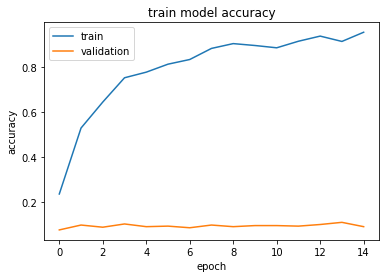

In [31]:
# Plot training & validation loss/accuracy values
print(train_history.history.keys())
#  "Accuracy"
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('train model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##Plotting loss vs epochs for training set

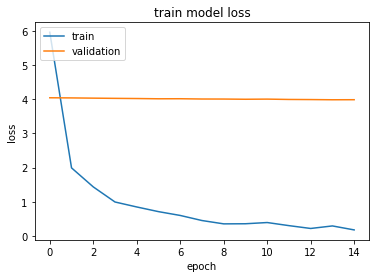

In [32]:
# "Loss"
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('train model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


##Compiling and the fitting the test set

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
epochs = 15
test_history = model.fit(X_test, y_test, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
14/14 [==============================] - 3s 149ms/step - loss: 0.8142 - accuracy: 0.8129 - val_loss: 0.7451 - val_accuracy: 0.8345
Epoch 2/15
14/14 [==============================] - 2s 154ms/step - loss: 0.7583 - accuracy: 0.8441 - val_loss: 0.7289 - val_accuracy: 0.8369
Epoch 3/15
14/14 [==============================] - 3s 204ms/step - loss: 0.7532 - accuracy: 0.8273 - val_loss: 0.7127 - val_accuracy: 0.8417
Epoch 4/15
14/14 [==============================] - 4s 272ms/step - loss: 0.7226 - accuracy: 0.8537 - val_loss: 0.6893 - val_accuracy: 0.8657
Epoch 5/15
14/14 [==============================] - 2s 156ms/step - loss: 0.6915 - accuracy: 0.8585 - val_loss: 0.6777 - val_accuracy: 0.8657
Epoch 6/15
14/14 [==============================] - 2s 157ms/step - loss: 0.7274 - accuracy: 0.8369 - val_loss: 0.6872 - val_accuracy: 0.8153
Epoch 7/15
14/14 [==============================] - 2s 136ms/step - loss: 0.6886 - accuracy: 0.8441 - val_loss: 0.6504 - val_accuracy: 0.8633
Epoch 

##Plotting accuracy vs epochs for test set

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


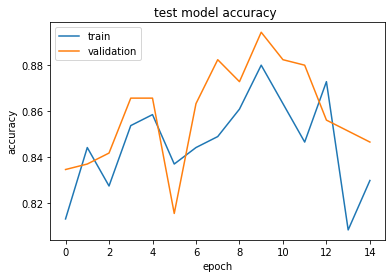

In [29]:
# Plot training & validation loss/accuracy values
print(test_history.history.keys())
#  "Accuracy"
plt.plot(test_history.history['accuracy'])
plt.plot(test_history.history['val_accuracy'])
plt.title('test model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##Plotting loss vs epochs for test set

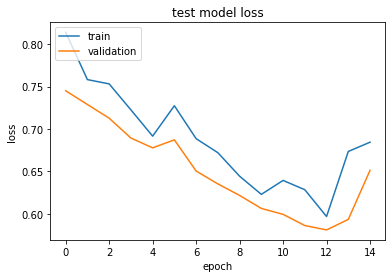

In [30]:
# "Loss"
plt.plot(test_history.history['loss'])
plt.plot(test_history.history['val_loss'])
plt.title('test model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##Model Prediction

In [35]:
test_pred=[]
for i in model.predict(X_test):
  test_pred.append(np.argmax(i))

In [39]:
test_pred=to_categorical(test_pred,58)

##Accuracy

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_pred)

0.8465227817745803